# Mushroom Classification

## Importing Relevant Libraries

In [2]:
#Relevant Analysis Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm

#Relevant Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Setting Seaborn as Default Visualization Library
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

## Loading Data

In [3]:
#Reading .csv file and saving as data_raw
data_raw = pd.read_csv('C:\\Users\\DELL\\Desktop\\Data_Akshay\\mushrooms.csv')

## 1. Exploring and Visualizing the Loaded Data

## 1.1. Data Exploration

In [4]:
#Exploring the Head Rows in the Data Set
data_raw.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [5]:
#Exploring the Tail Rows in the Data Set
data_raw.tail(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8114,p,f,y,c,f,m,a,c,b,y,...,y,c,c,p,w,n,n,w,c,d
8115,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,v,l
8116,p,k,y,n,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,l
8117,p,k,s,e,f,y,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
8118,p,k,y,n,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [6]:
#Exploring the Columns in the Data Set
data_raw.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
#Exploring the Data Types in the Data Set
data_raw.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [8]:
#Exploring the Shape of the Data Set
data_raw.shape

(8124, 23)

In [9]:
#Exploring the Discrete Statistics of the Data Set
data_raw.describe(include = 'all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## 1.2. Data Visualization

#### Cap Shape Variable; Count Plot

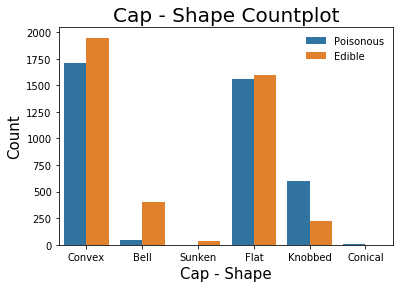

In [10]:
#Let's plot a Countplot for Variable Cap Shape
fig = sns.countplot(x= 'cap-shape', hue= 'class', data= data_raw)
plt.title('Cap - Shape Countplot', size= 20)
plt.xlabel('Cap - Shape', size= 15)
plt.ylabel('Count', size= 15)
fig.set(xticklabels= ['Convex', 'Bell', 'Sunken', 'Flat', 'Knobbed', 'Conical'])
fig.legend(['Poisonous', 'Edible'], frameon= False)
plt.show()

In [31]:
data_raw['cap-shape'].value_counts().to_dict()

{'x': 3656, 'f': 3152, 'k': 828, 'b': 452, 's': 32, 'c': 4}

#### Cap Surface Variable; Count Plot

<function matplotlib.pyplot.show(*args, **kw)>

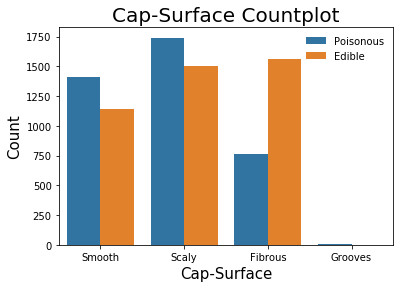

In [30]:
#Let's plot a Countplot for Variable Cap Surface
fig = sns.countplot(x= 'cap-surface', hue= 'class', data= data_raw)
plt.title('Cap-Surface Countplot', size= 20)
plt.xlabel('Cap-Surface', size= 15)
plt.ylabel('Count', size= 15)
fig.set(xticklabels= ['Smooth', 'Scaly', 'Fibrous', 'Grooves'])
fig.legend(['Poisonous', 'Edible'], loc= 'upper right', frameon= False)
plt.show

In [45]:
data_raw['cap-surface'].value_counts().to_dict()

{'y': 3244, 's': 2556, 'f': 2320, 'g': 4}

#### Cap Color Variable; Countplot

<function matplotlib.pyplot.show(*args, **kw)>

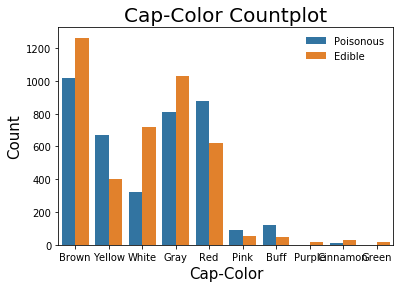

In [53]:
#Let's plot a Countplot for Variable Cap Color
fig = sns.countplot(x= 'cap-color', hue= 'class', data= data_raw)
plt.title('Cap-Color Countplot', size= 20)
plt.xlabel('Cap-Color', size= 15)
plt.ylabel('Count', size= 15)
fig.set(xticklabels= ['Brown', 'Yellow', 'White', 'Gray', 'Red', 'Pink', 'Buff', 'Purple', 'Cinnamon', 'Green'])
fig.legend(['Poisonous', 'Edible'], loc= 'upper right', frameon= False)
plt.show

In [47]:
data_raw['cap-color'].value_counts().to_dict()

{'n': 2284,
 'g': 1840,
 'e': 1500,
 'y': 1072,
 'w': 1040,
 'b': 168,
 'p': 144,
 'c': 44,
 'u': 16,
 'r': 16}

#### Cap Color Variable; Pie Chart